In [13]:
#載入套件
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
#匯入資料（但所有變數名稱皆是隱藏，但需要預測最後TARGET CLASS是哪個）
#index_col=0代表設定第一行為index
df = pd.read_csv('data/Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [19]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大
#載入標準化比例尺(StandardScaler)套件，只將所有`特徵值`做標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis = 1))
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [23]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
x = df_feat
y = df['TARGET CLASS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [28]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

#從k=1開始測試
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(x_train, y_train)
prediction = KNN.predict(x_test)

In [30]:
#測試KNN演算法的好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))

[[91  7]
 [ 4 98]]


In [32]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        98
           1       0.93      0.96      0.95       102

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [34]:
#剛剛只先用了k=1來建立模型，現在利用for來建立迴圈(選擇不同k值)，並紀錄錯誤率
error_rate = []

for i in range(1, 60):
    KNNi = KNN = KNeighborsClassifier(n_neighbors = i)
    KNNi.fit(x_train, y_train)
    predictioni = KNNi.predict(x_test)
    error_rate.append(np.mean(predictioni != y_test))


Text(0, 0.5, 'Error Rate')

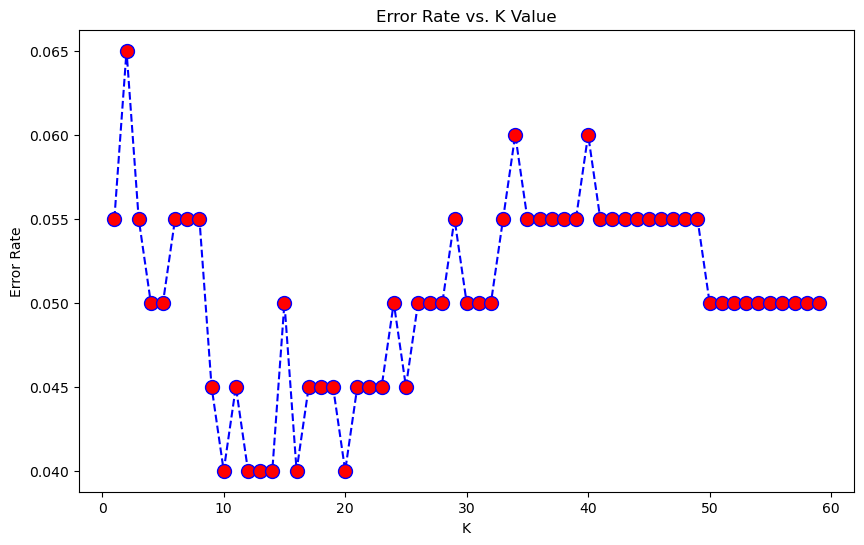

In [41]:
#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
#跟一開始k=1做比較
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

WITH k=1


[[91  7]
 [ 4 98]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.94        98
           1       0.93      0.96      0.95       102

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [45]:
#選擇錯誤率最低的K=?????來看precision、recall、f1-score、support表現
knn = KNeighborsClassifier(n_neighbors= 10)

knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print('WITH k=10')
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

WITH k=10


[[95  3]
 [ 5 97]]


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.97      0.95      0.96       102

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

